In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

To determine the temperature gradient over the thickness of the lubricant layer, we consider a boundary value problem based on a one-dimensional thermal conductivity equation using a numerical method. Let the temperature in the Ox direction be considered constant, assuming that the thermophysical characteristics do not depend on temperature. The Fourier differential equation of thermal conductivity will take the following form:
 $$ \frac{\partial \theta}{\partial t} =  a\frac{\partial ^ 2 \theta}{\partial z ^ 2}, (a = const > 0),(1)$$
where $\theta$ – the temperature of the lubricating layer, a – thermal conductivity of the lubricating layer.
<br/> The initial and boundary conditions will be written as follows:
 $$ t = 0:\theta(z,0) = 0,  0 > z > H; (2)$$
 $$ z = 0: -\lambda \frac{\partial \theta}{\partial z} =  \alpha \tau v_{0} (1 -\frac{z}{H}),  t > 0; (3)$$
 $$ z = H: \theta(\infty,t) = 20, (3)$$
where $\alpha$ – the coefficient of heat distribution between the lubricant and the surface rotating at speed thermal conductivity of the lubricating layer $v_{0}$, $\lambda$ - thermal conductivity of the lubricating layer, H - the gap, $\tau$ - shear stress of the lubricating layer. 
<br/> The following modes of operation of the friction pair were selected: the coefficient of heat distribution between the lubricant is 0.5, the sliding speed is 0.266 m/s, the gap between the samples - $2 \cdot 10 ^ {-6}$, The load on the sample varies from 72 to 200 N. The displacement amplitude is 80 mm.Thermophysical properties of the lubricant: $\rho$=911 $\frac{кг}{м^3}$, $c = 2037 \frac{Дж}{кг\cdot\circ С}$. Thermal conductivity of engine oil $\lambda_{e.o.}$ compose 0.134 $\frac{Вт}{м\cdot\circ С}$, thermal conductivity of fullerene $С_{60}$ - 0,2 $\frac{Вт}{м\cdot\circ С}$. The concentration of fullerene $\varphi$ in engine oil varies from 0.1 to 2. The duration of one test is 1 hour.
<br/> The thermal conductivity of a lubricant composition with fullerenes $\lambda$ is calculated as follows:
$$\lambda =\lambda_{e.o.}+\lambda_{C_{60}} \cdot\varphi, (4)$$
where $\lambda_{e.o.}$ is the thermal conductivity of engine oil, the thermal conductivity of fullerene $C_{60}$, $\varphi$ is the concentration of fullerene $C_{60}$ in engine oil.

In [5]:
DISTANCE_TRAVELLED = 0.08 
N = 500 
MF = 500
ALFA_COEF = 0.5
SPEED = 0.266
H = 2e-6
Z = 1.9e-6
TIME = 3600
C = 2037
RO = 911
AREA = 6.4e-04
T_END = 1000

To solve the problem numerically, we divide the lubricant by thickness into $N-1$ equal intervals, i.e. we construct a finite difference grid. Let's define the temperature value in the $i$th node at time $t=t_{n} = n\cdot k$ as $\theta(z_{i},t_{n} )=\theta_{i}^n.$ Here $k$ is the integration step along the time coordinate, is the time step number.
Next, we replace the differential operators in (1) with their finite–difference counterparts. We will use an implicit scheme:
$$ \frac{\partial \theta}{\partial t} = \frac{\theta_{i}^ {n+1} - \theta_{i}^ {n}}{k},$$
$$ \frac{\partial ^ 2 \theta}{\partial z ^ 2} = \frac{\theta_{i+1}^ {n+1} - \theta_{i}^ {n+1} + \theta_{i-1}^ {n+1}}{h ^ 2}, (5)$$
<br/> As a result of approximation of partial derivatives by corresponding finite differences, we obtain the following system of linear algebraic equations (SLAE):
:
$$\rho c \frac{\theta_{i}^ {n+1} - \theta_{i}^ {n}}{k} = \lambda (\frac{\theta_{i+1}^ {n+1} - \theta_{i}^ {n+1} + \theta_{i-1}^ {n+1}}{h ^ 2}), i = 2,...,N-1, n\geq0.  (6)  $$ 
The resulting system can be reduced to the most general form:
$$ A_{i}\theta_{i+1}^ {n+1} - B_{i}\theta_{i}^ {n+1} + C_{i}\theta_{i-1}^ {n+1} = F_{i}, (7)$$
где $A_{i} = C_{i} =\frac{\lambda}{h^2}$, $B_{i} = 2\frac{\lambda}{h^2} + \frac{\rho c}{k}$, $F_{i} = -\frac{\rho c}{k}\theta_{i}^ {n} $.
<br/> Equations (7) are called three-point difference equations of the second order. The system (7) has a tridiagonal structure, so we consider a non-stationary problem. Such a system must be solved at each time step. 
Let's add that using such sets, you can get $\alpha_{i}$ and $\beta_{i}$$(i = \overline{1,N-1}),$ when 

$$\theta_{i}^ {n+1} = \alpha_{i}\theta_{i+1}^ {n+1} + \beta_{i}, (8)$$
that is, the system of equations (7) is transformed into a two-point equation of the first order (8). Substituting expression (8) into equation (7), we obtain:
$$\theta_{i}^ {n+1} = \frac{A_{i}}{B_{i} - C_{i}\alpha_{i-1}}\theta_{i+1}^ {n+1} + \frac{C_{i}\beta_{i-1} - F_{i}}{B_{i} - C_{i}\alpha_{i-1}}. (9)$$
The last equality has the form (9) if for $i=2,3,...,N-1$ all the relations are fulfilled 
$$\alpha_{i} = \frac{A_{i}}{B_{i} - C_{i}\alpha_{i-1}},  \beta_{i} = \frac{C_{i}\beta_{i-1} - F_{i}}{B_{i} - C_{i}\alpha_{i-1}}. (10)$$
To determine $\alpha_{i}$ and $\beta_{i}$ by (10), it is necessary to know $\alpha_{1}$ and $\alpha_{1}$, which are from the left boundary condition.
Decompose the function $\theta(z)$ into a Taylor series in the vicinity of the point $z=0$ to terms of the second order with respect to $h$:

$$\theta_{2}^ {n+1} =  \theta_{1}^ {n+1} + h\frac{\partial\theta}{\partial z}\bigg|_{z=0}^{n+1} + h^2\frac{\partial ^ 2 \theta}{\partial z ^ 2}\bigg|_{z=0}^{n+1}.    $$
Using the ratio (1) we obtain:
$$\theta_{2}^ {n+1} =  \theta_{1}^ {n+1} + h\frac{\partial\theta}{\partial z}\bigg|_{z=0}^{n+1} + \frac{h^2}{2a}\frac{\partial \theta}{\partial t}\bigg|_{z=0}^{n+1};    $$
$$\frac{\partial\theta}{\partial z}\bigg|_{z=0}^{n+1} = \frac{1}{h} \theta_{2}^ {n+1} - \theta_{1}^ {n+1} - \frac{h}{2a}\frac{\partial \theta}{\partial t}\bigg|_{z=0}^{n+1} =  \frac{\alpha \tau v_{0}}{\lambda} (1 -\frac{z}{H}).   $$
Then $$\theta_{1}^ {n+1} = \frac{2ak}{2ak+h^2}\theta_{2}^ {n+1} + \frac{h^2}{2ak+h^2}\theta_{1}^ {n} + \frac{2\alpha \tau v_{0}hak}{\lambda(2ak+h^2)} (1 -\frac{z}{H}). $$
Thus,
$$\alpha_{1} = \frac{2ak}{2ak+h^2},$$
$$\beta_{1} = \frac{h^2}{2ak+h^2}\theta_{1}^ {n} + \frac{2\alpha \tau v_{0}hak}{\lambda(2ak+h^2)} (1 -\frac{z}{H}).$$
At the right boundary, the temperature is $$\theta|_{z=H} = 20. $$

In [10]:
def grad_temperature(concentration, force):
    tau_tau = force / AREA
    lamda = 0.134 + 0.2 * concentration
    a = lamda / (C * RO)
    h = DISTANCE_TRAVELLED / (10 * (N - 1))
    tau = TIME / 100.0
    T = np.ones(MF) 
    alfa = np.zeros(MF)
    beta = np.zeros(MF)
    T[0] = 0
    t = 0
    while t < T_END:
        alfa[0] = (2 * a * tau)/(2 * a * tau + h * h)
        beta[0] = (h*h*T[0])/(2*a*tau+h*h)+(2*a*tau_tau*h*ALFA_COEF*SPEED*tau*(1-Z / H))/(lamda*(2*a*tau+h*h))
        for i in range(1, N-2):
            ai = lamda / (h * h)
            ci = lamda / (h * h)
            bi = 2 * lamda / (h * h) + C * RO / tau
            fi = - C * RO * T[i] / tau
            alfa[i] = ai / (bi - ci * alfa[i - 1])
            beta[i] = (ci * beta[i-1] - fi) / (bi - ci * alfa[i-1])
        T[N-1] = 20
        for i in range (N-2, 0, -1):
            T[i] = alfa[i] * T[i+1] + beta[i]
        t = t + tau
    return np.mean(T)

In [11]:
concentration = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.4, 1.6, 1.8, 1.9, 2]
force = [72, 112, 200]
df_1 = []
df_2 = []
df_3 = []
for j in concentration:
    df_1.append(grad_temperature(j, 72))
    df_2.append(grad_temperature(j, 112))
    df_3.append(grad_temperature(j, 200))    

In [12]:
d = {
    'Concentration': concentration,
    'Temperature (force = 72N)': df_1,
    'Temperature (force = 112N)': df_2,
    'Temperature (force = 200N)': df_3
}
data = pd.DataFrame(data=d)
data

,Concentration,Temperature (force = 72N),Temperature (force = 112N),Temperature (force = 200N)
0,0.1,18.087601,28.094237,50.108837
1,0.2,16.283047,25.293341,45.115990
2,0.3,14.777123,22.955002,40.946336
3,0.4,13.507550,20.982987,37.428950
4,0.5,12.426807,19.303807,34.433207
5,0.6,11.498375,17.860944,31.858595
6,0.7,10.693967,16.610589,29.627156
7,0.8,9.991482,15.518494,27.677918
8,0.9,9.373502,14.557652,25.962781
9,1.0,8.826180,13.706586,24.443479


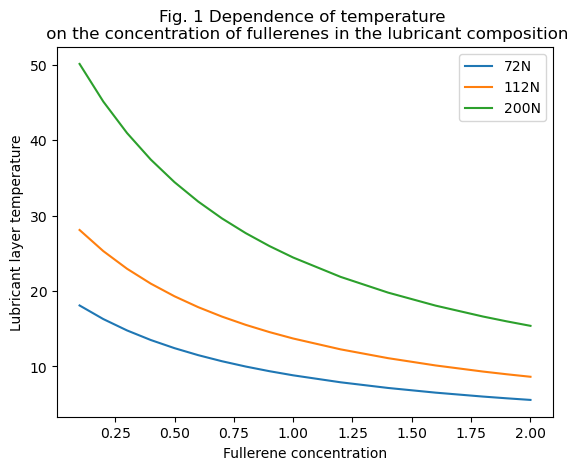

In [13]:
plt.plot(data['Concentration'], data['Temperature (force = 72N)'], label='72N');
plt.plot(data['Concentration'], data['Temperature (force = 112N)'], label='112N');
plt.plot(data['Concentration'], data['Temperature (force = 200N)'], label='200N');
plt.title('Fig. 1 Dependence of temperature \n on the concentration of fullerenes in the lubricant composition')
plt.xlabel('Fullerene concentration')
plt.ylabel('Lubricant layer temperature')
plt.legend();
    